
# Install and import the required libraries

In [88]:
#install pandas profiling library
!pip uninstall -y pandas-profiling --quiet
!pip install -U pandas-profiling --quiet

# Import the required libraries

In [85]:

import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer

# Load the dataset

In [86]:
# load the dataset
data = pd.read_csv('/content/Data_origine.xls')

In [87]:
data.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

### Analyse the Data

In [80]:
# la dimention de la data
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
missing_values = data.isnull().sum()
missing_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
data_numeric = data.select_dtypes(include=[np.number])
data_numeric.describe(include='all').T

AttributeError: 'Index' object has no attribute '_format_flat'

                           count         mean           std      min      25%  \
Type                     10000.0      0.50030      0.671301      0.0      0.0   
Air temperature [K]      10000.0    300.00493      2.000259    295.3    298.3   
Process temperature [K]  10000.0    310.00556      1.483734    305.7    308.8   
Rotational speed [rpm]   10000.0   1538.77610    179.284096   1168.0   1423.0   
Torque [Nm]              10000.0     39.98691      9.968934      3.8     33.2   
Tool wear [min]          10000.0    107.95100     63.654147      0.0     53.0   
Machine failure          10000.0      0.03480      0.183282      0.0      0.0   
Power[W]                 10000.0  59967.14704  10193.093881  10966.8  53105.4   

                             50%       75%      max  
Type                         0.0      1.00      2.0  
Air temperature [K]        300.1    301.50    304.5  
Process temperature [K]    310.1    311.10    313.8  
Rotational speed [rpm]    1503.0   1612.00   2886.0  


0    9661
1     339
Name: Machine failure, dtype: int64


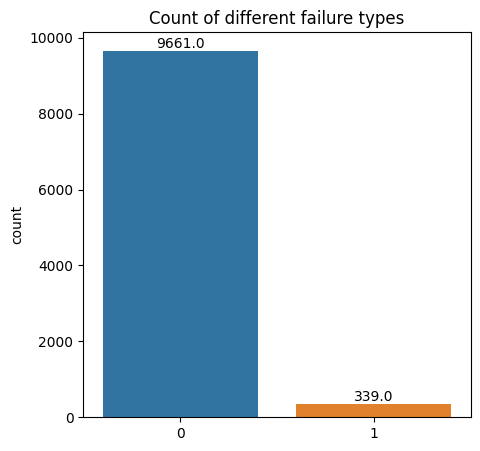

In [ ]:
print(data["Machine failure"].value_counts()) # data est diséquilibré
failure_machine = data.loc[:, ['Machine failure']]

rows_sum = failure_machine.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

Text(0.5, 1.0, '"Analyse des divers types de défaillance par enregistrement"')

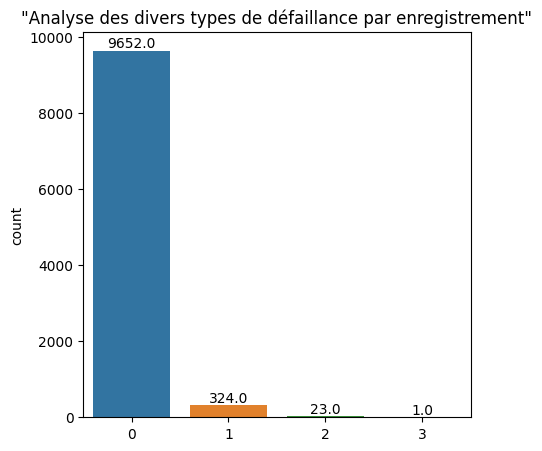

In [ ]:
mode_failure = data.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

nb_failure = mode_failure.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=nb_failure, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('"Analyse des divers types de défaillance par enregistrement"')

In [ ]:
data_dict = {
    'TWF': [data["TWF"].value_counts(normalize=True)[0] * 100, data["TWF"].value_counts(normalize=True)[1] * 100],
    'HDF': [data["HDF"].value_counts(normalize=True)[0] * 100, data["HDF"].value_counts(normalize=True)[1] * 100],
    'PWF': [data["PWF"].value_counts(normalize=True)[0] * 100, data["PWF"].value_counts(normalize=True)[1] * 100],
    'OSF': [data["OSF"].value_counts(normalize=True)[0] * 100, data["OSF"].value_counts(normalize=True)[1] * 100],
    'RNF': [data["RNF"].value_counts(normalize=True)[0] * 100, data["RNF"].value_counts(normalize=True)[1] * 100],
    'Machine failure': [data["Machine failure"].value_counts(normalize=True)[0] * 100, data["Machine failure"].value_counts(normalize=True)[1] * 100]
}

df = pd.DataFrame(data_dict, index=['0', '1'])
df = df.transpose()
df.columns = ['Percentage of 0', 'Percentage of 1']
print(df)

                 Percentage of 0  Percentage of 1
TWF                        99.54             0.46
HDF                        98.85             1.15
PWF                        99.05             0.95
OSF                        99.02             0.98
RNF                        99.81             0.19
Machine failure            96.61             3.39


### D'après cette première partie, on déduit:


1.   Il y a un incohérences entre la somme des défaillance de la machine et la sammme de défaillance sighalé pour toutes les modes. Ces incohérences pourraient être des cas où une défaillance de la machine est signalée sans qu'aucun des modes de défaillance connus ne soit déclenché, ou une défaillance de la machine n'est pas signalée alors qu'une des défaillances a été déclenchée.
2.   Data est déséquilibrée : la fréquence de failures est très grand par rapport celui où il n'y pas de défaillance

3.  Seulment 24 enregistrements contiennent plus d'un type de défaillance, qu'il est très faible par rapport à l'ensemble du jeu de données
4.   



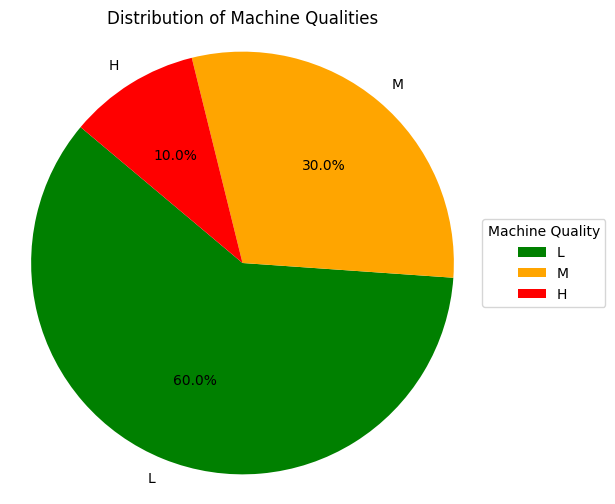

In [ ]:
# Visualisation the distribution of machine qualities

machine_qualities = data['Type'].value_counts()
labels = machine_qualities.index
counts = machine_qualities.values


colors = ['green', 'orange', 'red']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Machine Qualities')
plt.legend(labels, title="Machine Quality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

### Cette pie chart ci-dessous révèle comment les défaillances sont distribuées entre les différentes qualités de machines. Cette analyse est essentielle pour déterminer si certaines qualités de machines sont plus susceptibles de connaître des défaillances..

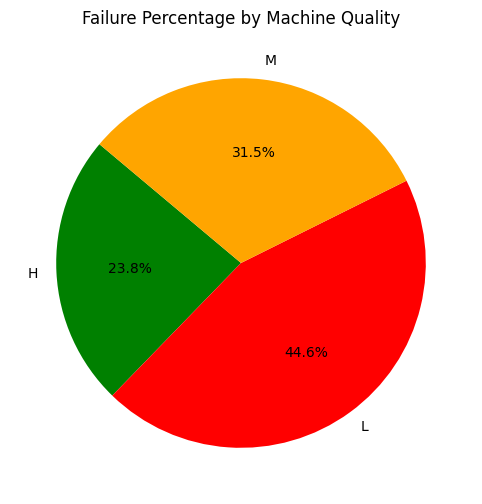

In [ ]:
# Visualisation the failure Percentage by Machine Quality

failure_counts = data.groupby('Type')['Machine failure'].sum().reset_index()
failure_counts.columns = ['Machine Quality', 'Failure Count']


value_counts = data['Type'].value_counts().reset_index()
value_counts.columns = ['Machine Quality', 'Total Count']


failure_counts = failure_counts.merge(value_counts, on='Machine Quality')
failure_counts['Failure Percentage'] = (failure_counts['Failure Count'] / failure_counts['Total Count']) * 100


colors = {'L': 'red', 'M': 'orange', 'H': 'green'}

# Plotting the pie chart using the failure percentages for each machine quality

plt.figure(figsize=(10, 6))
plt.pie(failure_counts['Failure Percentage'], labels=failure_counts['Machine Quality'],
        autopct='%1.1f%%', startangle=140, colors=[colors[label] for label in failure_counts['Machine Quality']])
plt.title('Failure Percentage by Machine Quality')
plt.show()


### Il est clair que les machines classées comme étant de « Qualité Basse » présentent un taux de défaillance plus élevé que celles classées comme étant de « Qualité Élevée ». Cela suggère qu'il est nécessaire d'effectuer des maintenances plus fréquentes ou des évaluations de qualité pour les machines de « Qualité Basse » afin de réduire les temps d'arrêt

# Data Preparation

In [ ]:
# Supprimer les deux features "UDI" et "Product ID"
data.drop(['UDI','Product ID'],axis=1,inplace=True)
data.shape

(10000, 12)

In [ ]:
# les lignes où 'machine failure' est égal à 0 mais où au moins un mode de défaillance est égal à 1

condition_1 = (
    (data['Machine failure'] == 1) &
    (data['TWF'] == 0) &
    (data['HDF'] == 0) &
    (data['PWF'] == 0) &
    (data['OSF'] == 0) &
    (data['RNF'] == 0)
)

# Identifying rows where 'machine failure' is 0 but at least one failure mode is 1
condition_2 = (
    (data['Machine failure'] == 0) &
    ((data['TWF'] == 1) |
     (data['HDF'] == 1) |
     (data['PWF'] == 1) |
     (data['OSF'] == 1) |
     (data['RNF'] == 1))
)

print(f"Found {len(data[condition_1])} instances of 'Machine failure' with no individual modes triggered.")
print(f"Found {len(data[condition_2])} instances of individual failure modes triggered without 'Machine failure'.")


data.loc[condition_1, 'Machine failure'] = 0
data.loc[condition_2, 'Machine failure'] = 1


Found 9 instances of 'Machine failure' with no individual modes triggered.
Found 18 instances of individual failure modes triggered without 'Machine failure'.


### Après la synchronisation entre la colonne "Machine failure" et 5 colonnes de modes défaillance, on peut supprimer  ces derniers colonnes

In [ ]:
data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [ ]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
data['Type'].replace('L', 0, inplace=True)
data['Type'].replace('M', 1, inplace=True)
data['Type'].replace('H', 2, inplace=True)

In [ ]:
# turn all columns into float for easier processing later
data.dtypes

Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

In [ ]:
data.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     0                298.2                    308.7                    1408   
2     0                298.1                    308.5                    1498   
3     0                298.2                    308.6                    1433   
4     0                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         42.8                0                0  
1         46.3                3                0  
2         49.4                5                0  
3         39.5                7                0  
4         40.0                9                0  

### la puissance = Couple * Vitesse de rotation


1.   Puissance (PowerPower) : La puissance représente la quantité de travail effectuée par unité de temps. Elle mesure la vitesse à laquelle le travail est effectué.

2. Couple (TorqueTorque) : Le couple est une mesure de la force qui peut causer un objet à tourner autour d'un axe fixe ou pivot. Il représente la quantité de force appliquée à une certaine distance du point de rotation.

3. Vitesse de rotation (Rotational speedRotational speed) : C'est la vitesse à laquelle un objet tourne autour de son axe de rotation. Elle mesure le taux de changement de l'angle de rotation par unité de temps. L'unité SI de la vitesse de rotation est le radian par seconde (rad/s)


### Power=Torque×Rotational speed


In [ ]:
# Ajoute des nouveaux features à notre data.
data['Power[W]'] = data[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)


<Axes: xlabel='Power[W]', ylabel='Count'>

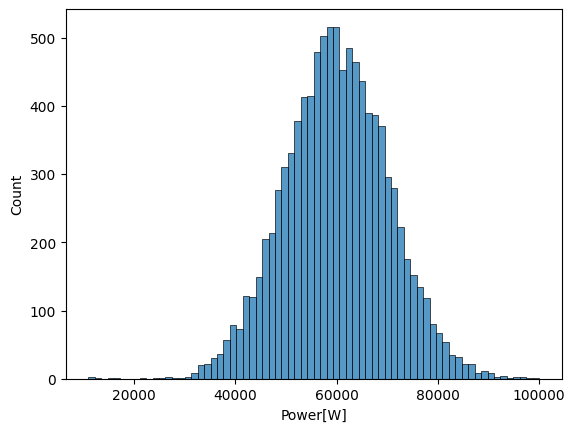

In [ ]:
# Plot the histogram of Power attribute
sns.histplot(data['Power[W]'])

In [ ]:
data.describe()

AttributeError: 'Index' object has no attribute '_format_flat'

               Type  Air temperature [K]  Process temperature [K]  \
count  10000.000000         10000.000000             10000.000000   
mean       0.500300           300.004930               310.005560   
std        0.671301             2.000259                 1.483734   
min        0.000000           295.300000               305.700000   
25%        0.000000           298.300000               308.800000   
50%        0.000000           300.100000               310.100000   
75%        1.000000           301.500000               311.100000   
max        2.000000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.034800   
std                179.284096      9.968934        63.654147         0.183282   
min               1168.000000      3.800000         0.

In [ ]:
data.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     0                298.2                    308.7                    1408   
2     0                298.1                    308.5                    1498   
3     0                298.2                    308.6                    1433   
4     0                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  Power[W]  
0         42.8                0                0   66382.8  
1         46.3                3                0   65190.4  
2         49.4                5                0   74001.2  
3         39.5                7                0   56603.5  
4         40.0                9                0   56320.0  

## Data separation

In [ ]:
# Préparation des vécteurs

X_0 = data.drop(['Machine failure'], axis=1)
Y_0 = data['Machine failure']

In [ ]:
X_0.shape

(10000, 7)

In [ ]:
Y_0.shape

(10000,)

In [ ]:
# Equilibrer la data :

# Définition de la fonction pour ajouter du bruit gaussien
def add_gaussian_noise(X, noise_level=0.0001):

    noise = np.random.normal(scale=noise_level, size=X.shape)

    X_augmented = X + noise

    return X_augmented

# Initialiser le suréchantillonneur
oversample = RandomOverSampler(sampling_strategy='minority')

# Appliquer le suréchantillonnage à vos données
X_R_D, Y_R = oversample.fit_resample(X_0, Y_0)

# Augmenter les données avec du bruit gaussien
#X_R_D = add_gaussian_noise(X_R, noise_level=0.01)

NameError: name 'RandomOverSampler' is not defined

In [ ]:
data.shape

In [ ]:
X_R_D.shape

In [ ]:
Y_R.shape

In [ ]:
data.head()

<Axes: >

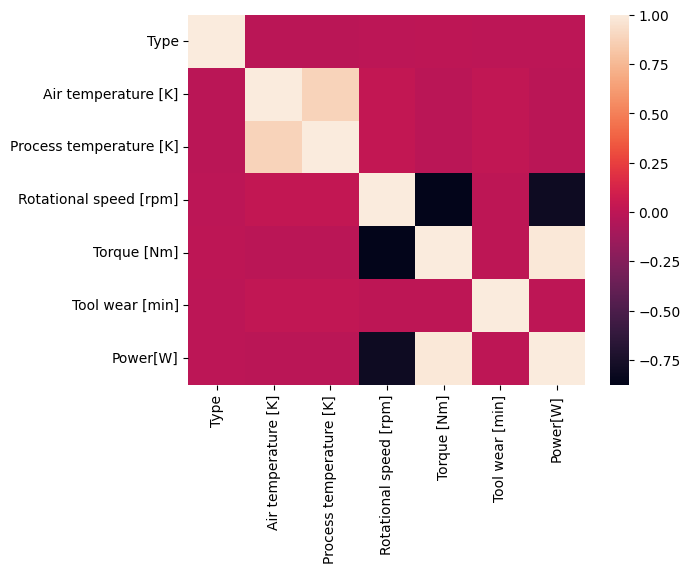

In [ ]:
#La correlation (Donner des interprétation)
import  seaborn as sns
corr=X_0.corr()
sns.heatmap(data=corr)

In [ ]:
corr

AttributeError: 'Index' object has no attribute '_format_flat'

                             Type  Air temperature [K]  \
Type                     1.000000            -0.015176   
Air temperature [K]     -0.015176             1.000000   
Process temperature [K] -0.012101             0.876107   
Rotational speed [rpm]  -0.003979             0.022670   
Torque [Nm]             -0.003097            -0.013778   
Tool wear [min]         -0.007255             0.013853   
Power[W]                -0.004784            -0.011474   

                         Process temperature [K]  Rotational speed [rpm]  \
Type                                   -0.012101               -0.003979   
Air temperature [K]                     0.876107                0.022670   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Torque [Nm]                            -0.014061               -0.875027   
Tool wear [min]                         0.013488                0.000223   
Pow

In [ ]:
# Sélectionner les attributs avec une variance supérieure à 0.01
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(X_0)

NameError: name 'VarianceThreshold' is not defined

In [ ]:
#Calculer la matrice de correlation après suppréssion des attributs à faible variance
corr= pd.DataFrame(selected_features).corr()
corr

In [ ]:
#La correlation (Donner des interprétation)
sns.heatmap(data=corr)

In [ ]:
# Visualisation des relations entre les features

sns.pairplot(data.sample(frac=0.05), hue='Machine failure')

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X_R_D)
X=Normalizer().fit_transform(X)

NameError: name 'X_R_D' is not defined

In [ ]:
# Redimentionne le vecteur Y_R
Y = Y_R.values.reshape(19304, 1)

In [ ]:
print(X.shape)
print(Y.shape)

# Modeling

### import the bibliothèque

In [ ]:
# import the bibliothèque nécessaire

import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, log_loss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score,matthews_corrcoef, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# créer une dataframe pour enregistrer les différentes métriques utilisées:

model_performance = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'MCC', 'ROC AUC', 'Training Time', 'Prediction Time', 'Total Time'])

### Data splitting and sampling

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = Y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'X' is not defined

In [ ]:
# sampling the data

oversample = SVMSMOTE(random_state = 42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# verification que la data est bien équilibré

y_train_series = pd.Series(y_train)
value_counts = y_train_series.value_counts()

print(value_counts)

# Tracer un histogramme
plt.hist(y_train_series)
plt.show()


## Decision Tree Model

In [ ]:
# cherchons la bonne valeur du profondant de l'arbre de décision

max_depth_values = list(range(1, 20))

train_errors = []
test_errors = []

for max_depth in max_depth_values:

    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    y_train_prob = dt.predict_proba(X_train)
    y_test_prob = dt.predict_proba(X_test)


    train_error = log_loss(y_train, y_train_prob)
    test_error = log_loss(y_test, y_test_prob)


    train_errors.append(train_error)
    test_errors.append(test_error)

# Tracer les courbes d'erreur d'entraînement et de test

plt.figure(figsize=(6, 6))
plt.plot(max_depth_values, train_errors, label='Training Error')
plt.plot(max_depth_values, test_errors, label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Log Loss')
plt.title('Learning Curve for DecisionTreeClassifier')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
# D'après la résultat précédente la meilleur valeur est 7(inférieur à 7.5 )


start = time.time()

model_DTC = DecisionTreeClassifier(max_depth = 7)
model_DTC.fit(X_train, y_train)

end_train = time.time()

y_pred_DTC = model_DTC.predict(X_test)

end_predict = time.time()

In [ ]:
# Evaluation de modèle decision tree

accuracy = accuracy_score(y_test, y_pred_DTC)
recall = recall_score(y_test, y_pred_DTC, average='weighted')
precision = precision_score(y_test, y_pred_DTC, average='weighted')
f1s = f1_score(y_test, y_pred_DTC, average='weighted')
MCC = matthews_corrcoef(y_test, y_pred_DTC)
ROC_AUC = roc_auc_score(y_test, model_DTC.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")


NameError: name 'y_test' is not defined

In [ ]:
# Enregistrement de modèle decision tree
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,ROC_AUC,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model_DTC, X, Y, cv=7)

# plot the learning curve

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

NameError: name 'model_DTC' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred_DTC)
disp = ConfusionMatrixDisplay(cm)
disp = disp.plot()
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
#Calculer et Tracer la courbe ROC et l'AUC
YtestDTProba_DTC = model_DTC.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,YtestDTProba_DTC[:,1] )
AUCRF= auc(fpr, tpr)
plt.plot(fpr, tpr, label="Decision Tree AUC = "+ str(round(AUCRF,3)))
plt.legend()

### Regression logistique

In [ ]:
%%time
start = time.time()
model_RL = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_pred_RL = model_RL.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

NameError: name 'X_train' is not defined

In [ ]:
accuracy = accuracy_score(y_test, y_pred_RL)
recall = recall_score(y_test, y_pred_RL, average='weighted')
precision = precision_score(y_test, y_pred_RL, average='weighted')
f1s = f1_score(y_test, y_pred_RL, average='weighted')
MCC = matthews_corrcoef(y_test, y_pred_RL)
ROC_AUC = roc_auc_score(y_test, model_RL.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")



NameError: name 'y_test' is not defined

In [ ]:
# Enregistrement de la performance du modèle regression logistique
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,MCC,ROC_AUC,end_train-start,end_predict-end_train,end_predict-start]

NameError: name 'accuracy' is not defined

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_RL, X, Y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred_RL)
disp = ConfusionMatrixDisplay(cm)
disp = disp.plot()
plt.show()

In [ ]:
#Calculer et Tracer la courbe ROC et l'AUC
YtestDTProba_RL = model_RL.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,YtestDTProba_RL[:,1] )
AUCRF= auc(fpr, tpr)
plt.plot(fpr, tpr, label="Decision Tree AUC = "+ str(round(AUCRF,3)))
plt.legend()

NameError: name 'model_RL' is not defined

### Random forest

In [ ]:
%%time


start = time.time()
model_RF = RandomForestClassifier(n_estimators = 5,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_pred_RF = model_RF.predict(X_test)
end_predict = time.time()


NameError: name 'X_train' is not defined

In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
f1s_RF = f1_score(y_test, y_pred_RF, average='weighted')
MCC_RF = matthews_corrcoef(y_test, y_pred_RF)
ROC_AUC_RF = roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy_RF))
print("Recall: "+ "{:.2%}".format(recall_RF))
print("Precision: "+ "{:.2%}".format(precision_RF))
print("F1-Score: "+ "{:.2%}".format(f1s_RF))
print("MCC: "+ "{:.2%}".format(MCC_RF))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['Random forest'] = [accuracy_RF, recall_RF, precision_RF, f1s_RF,MCC_RF,ROC_AUC_RF,end_train-start,end_predict-end_train,end_predict-start]

NameError: name 'y_test' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

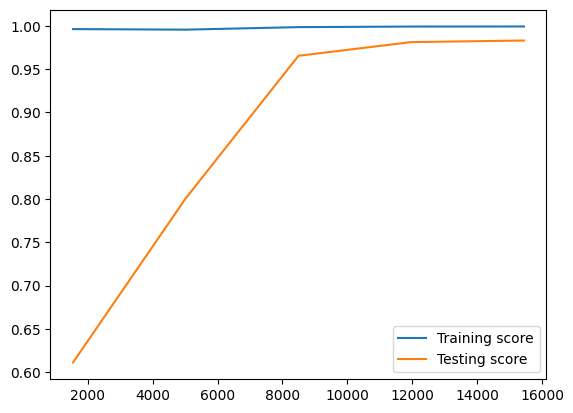

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model_RF, X, Y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

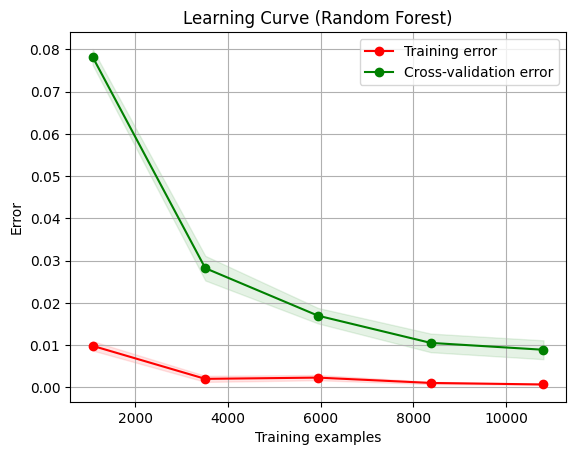

In [ ]:
def plot_learning_curve_error(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_errors, test_errors = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_errors_mean = -np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = -np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    return plt

# Utilisation de la fonction pour tracer les courbes d'évolution de l'erreur
plot_learning_curve_error(model_RF, "Learning Curve (Random Forest)", X_train, y_train, cv=5, n_jobs=-1)

plt.show()



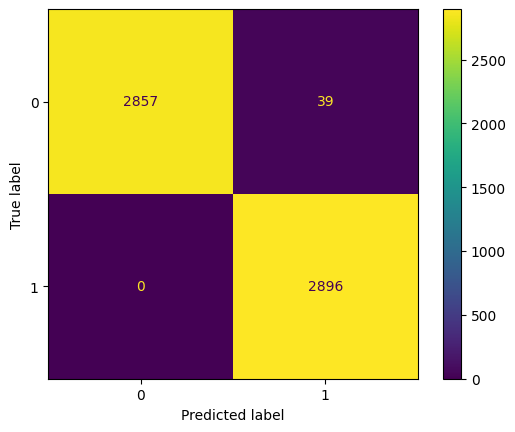

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
disp = ConfusionMatrixDisplay(cm_RF)
disp = disp.plot()
plt.show()

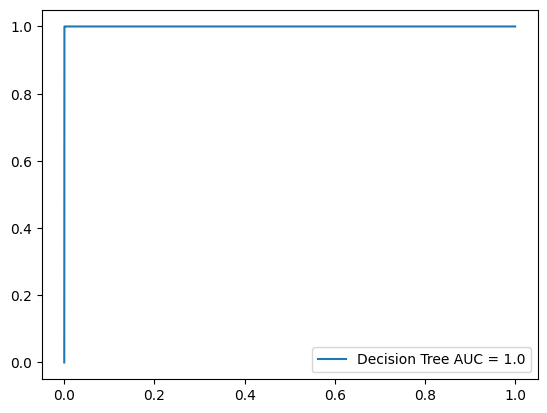

In [ ]:
#Calculer et Tracer la courbe ROC et l'AUC
YtestDTProba_RF = model_RF.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,YtestDTProba_RF[:,1] )
AUCRF= auc(fpr, tpr)
plt.plot(fpr, tpr, label="Decision Tree AUC = "+ str(round(AUCRF,3)))
plt.legend()

## SVM classification


1.   model_SVM_1 : kernel = 'linear'
2.   model_SVM_2 : kernel = 'rbf'
3.   model_SVM_3 : kernel = 'sigmoid'
4.   model_SVM_4 : kernel = 'poly'



In [ ]:
# modèle svm avec kernel='linear'
%%time


start = time.time()

model_SVM_1 = svm.SVC(kernel = 'linear', probability=True)
model_SVM_1.fit(X_train,y_train)

end_train = time.time()

y_pred_SVM_1 = model_SVM_1.predict(X_test)

end_predict = time.time()

In [ ]:
accuracy_SVM_1 = accuracy_score(y_test, y_pred_SVM_1)
recall_SVM_1 = recall_score(y_test, y_pred_SVM_1, average='weighted')
precision_SVM_1 = precision_score(y_test, y_pred_SVM_1, average='weighted')
f1s_SVM_1 = f1_score(y_test, y_pred_SVM_1, average='weighted')
MCC_SVM_1 = matthews_corrcoef(y_test, y_pred_SVM_1)
ROC_AUC_SVM_1 = roc_auc_score(y_test, model_SVM_1.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy_SVM_1))
print("Recall: "+ "{:.2%}".format(recall_SVM_1))
print("Precision: "+ "{:.2%}".format(precision_SVM_1))
print("F1-Score: "+ "{:.2%}".format(f1s_SVM_1))
print("MCC: "+ "{:.2%}".format(MCC_SVM_1))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC_SVM_1))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['SVM_Linear'] = [accuracy_SVM_1, recall_SVM_1, precision_SVM_1, f1s_SVM_1,MCC_SVM_1,ROC_AUC_SVM_1,end_train-start,end_predict-end_train,end_predict-start]

NameError: name 'accuracy_score' is not defined

In [ ]:
# modèle svm avec kernel='rbf'
%%time


start = time.time()

model_SVM_2 = svm.SVC(kernel = 'rbf', probability=True)
model_SVM_2.fit(X_train,y_train)

end_train = time.time()

y_pred_SVM_2 = model_SVM_2.predict(X_test)

end_predict = time.time()

In [ ]:
accuracy_SVM_2 = accuracy_score(y_test, y_pred_SVM_2)
recall_SVM_2 = recall_score(y_test, y_pred_SVM_2, average='weighted')
precision_SVM_2 = precision_score(y_test, y_pred_SVM_2, average='weighted')
f1s_SVM_2 = f1_score(y_test, y_pred_SVM_2, average='weighted')
MCC_SVM_2 = matthews_corrcoef(y_test, y_pred_SVM_2)
ROC_AUC_SVM_2 = roc_auc_score(y_test, model_SVM_2.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy_SVM_2))
print("Recall: "+ "{:.2%}".format(recall_SVM_2))
print("Precision: "+ "{:.2%}".format(precision_SVM_2))
print("F1-Score: "+ "{:.2%}".format(f1s_SVM_2))
print("MCC: "+ "{:.2%}".format(MCC_SVM_2))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC_SVM_2))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['SVM_RBF'] = [accuracy_SVM_2, recall_SVM_2, precision_SVM_2, f1s_SVM_2,MCC_SVM_2,ROC_AUC_SVM_2,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
# modèle svm avec kernel='poly'
%%time


start = time.time()

model_SVM_3 = svm.SVC(kernel = 'sigmoid', probability=True)
model_SVM_3.fit(X_train,y_train)

end_train = time.time()

y_pred_SVM_3 = model_SVM_3.predict(X_test)

end_predict = time.time()

In [ ]:
accuracy_SVM_3 = accuracy_score(y_test, y_pred_SVM_3)
recall_SVM_3 = recall_score(y_test, y_pred_SVM_3, average='weighted')
precision_SVM_3 = precision_score(y_test, y_pred_SVM_3, average='weighted')
f1s_SVM_3 = f1_score(y_test, y_pred_SVM_3, average='weighted')
MCC_SVM_3 = matthews_corrcoef(y_test, y_pred_SVM_3)
ROC_AUC_SVM_3 = roc_auc_score(y_test, model_SVM_3.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy_SVM_3))
print("Recall: "+ "{:.2%}".format(recall_SVM_3))
print("Precision: "+ "{:.2%}".format(precision_SVM_3))
print("F1-Score: "+ "{:.2%}".format(f1s_SVM_3))
print("MCC: "+ "{:.2%}".format(MCC_SVM_3))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC_SVM_3))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['SVM_Poly'] = [accuracy_SVM_3, recall_SVM_3, precision_SVM_3, f1s_SVM_3,MCC_SVM_3,ROC_AUC_SVM_3,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
# modèle svm avec kernel='poly'
%%time


start = time.time()

model_SVM_4 = svm.SVC(kernel = 'poly', probability=True)
model_SVM_4.fit(X_train,y_train)

end_train = time.time()

y_pred_SVM_4 = model_SVM_4.predict(X_test)

end_predict = time.time()

In [ ]:
accuracy_SVM_4 = accuracy_score(y_test, y_pred_SVM_4)
recall_SVM_4 = recall_score(y_test, y_pred_SVM_4, average='weighted')
precision_SVM_4 = precision_score(y_test, y_pred_SVM_4, average='weighted')
f1s_SVM_4 = f1_score(y_test, y_pred_SVM_4, average='weighted')
MCC_SVM_4 = matthews_corrcoef(y_test, y_pred_SVM_4)
ROC_AUC_SVM_4 = roc_auc_score(y_test, model_SVM_4.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy_SVM_4))
print("Recall: "+ "{:.2%}".format(recall_SVM_4))
print("Precision: "+ "{:.2%}".format(precision_SVM_4))
print("F1-Score: "+ "{:.2%}".format(f1s_SVM_4))
print("MCC: "+ "{:.2%}".format(MCC_SVM_4))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC_SVM_4))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['SVM_POLY'] = [accuracy_SVM_4, recall_SVM_4, precision_SVM_4, f1s_SVM_4,MCC_SVM_4,ROC_AUC_SVM_4,end_train-start,end_predict-end_train,end_predict-start]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

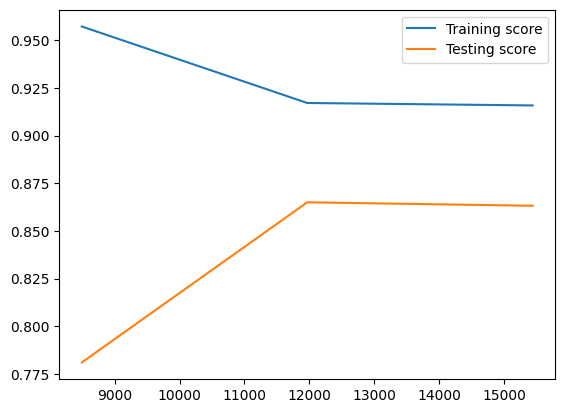

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model_SVM_2, X, Y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

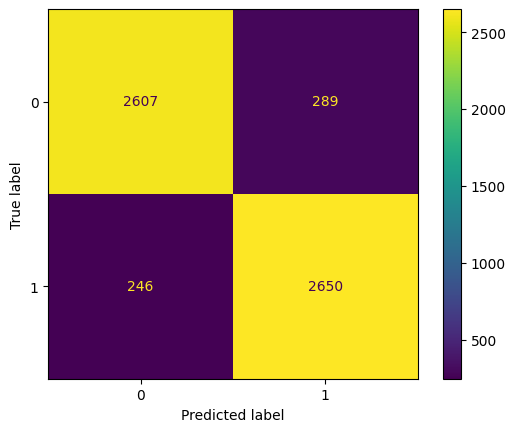

In [ ]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM_2)
disp = ConfusionMatrixDisplay(cm_SVM)
disp = disp.plot()
plt.show()

# Réseaux neurones

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time



start = time.time()

model_MLP = MLPClassifier(hidden_layer_sizes = (100,100,),
                           learning_rate_init=0.001,
                            max_iter=1000,
                            n_iter_no_change=30,
                            tol=.0001,
                            activation='relu',
                            solver='adam',
                            batch_size=2000,
                            verbose=0)
model_MLP.out_activation="softmaxe"
model_MLP.fit(X_train,y_train)

end_train = time.time()

y_pred_MLP = model_MLP.predict(X_test) # These are the predictions from the test data.

end_predict = time.time()

CPU times: user 2min 28s, sys: 58 s, total: 3min 26s
Wall time: 1min 57s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
accuracy_MLP = accuracy_score(y_test, y_pred_MLP)
recall_MLP = recall_score(y_test, y_pred_MLP, average='weighted')
precision_MLP = precision_score(y_test, y_pred_MLP, average='weighted')
f1s_MLP = f1_score(y_test, y_pred_MLP, average='weighted')
MCC_MLP = matthews_corrcoef(y_test, y_pred_MLP)
ROC_AUC_MLP = roc_auc_score(y_test, model_MLP.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy_MLP))
print("Recall: "+ "{:.2%}".format(recall_MLP))
print("Precision: "+ "{:.2%}".format(precision_MLP))
print("F1-Score: "+ "{:.2%}".format(f1s_MLP))
print("MCC: "+ "{:.2%}".format(MCC_MLP))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC_MLP))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['RNN_MLP'] = [accuracy_MLP, recall_MLP, precision_MLP, f1s_MLP,MCC_MLP,ROC_AUC_MLP,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
#matrice de confusion
cm = confusion_matrix(y_test, y_pred_MLP)
disp = ConfusionMatrixDisplay(cm)
disp = disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

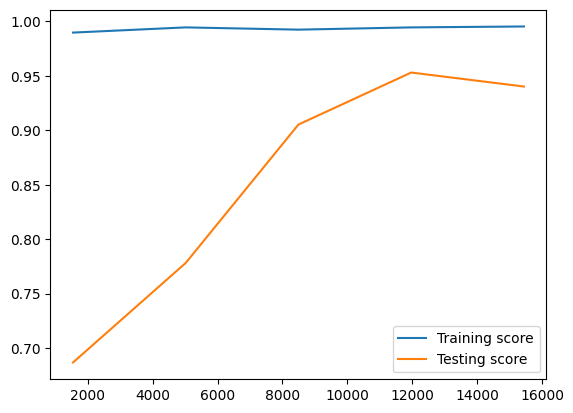

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model_MLP, X, Y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

In [ ]:
# Réseau de neuronne avec Tensorflow. L'objectif est de montrer la souplesse de tensorflow et la possibilité de personaliser l'architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation, Dropout
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model_1 = Sequential()

# Couche d'entrée
model_1.add(Dense(units=64, activation="relu", input_shape=(7,)))

# Couches cachées
model_1.add(Dense(units=128, activation="relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(units=64, activation="relu"))
model_1.add(Dense(units=64, activation="relu"))
model_1.add(Dropout(0.5))

# Couche de sortie
model_1.add(Dense(units=1, activation="sigmoid"))

# Compilation du modèle avec l'optimiseur "adam", la perte "binary_crossentropy" et la métrique "accuracy"
model_1.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

# optimizer: SGD ou adam
# loss : mean_squared_error ou categorical_crossentropy


In [ ]:
%%time

start = time.time()

history = model_1.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

end_train = time.time()

y_pred_proba = model_1.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

end_predict = time.time()


Epoch 1/100
136/136 [==============================] - 3s 7ms/step - loss: 0.1599 - accuracy: 0.7775 - val_loss: 0.1104 - val_accuracy: 0.8524
Epoch 2/100
136/136 [==============================] - 1s 5ms/step - loss: 0.1107 - accuracy: 0.8529 - val_loss: 0.0961 - val_accuracy: 0.8674
Epoch 3/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0958 - accuracy: 0.8718 - val_loss: 0.0813 - val_accuracy: 0.8935
Epoch 4/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0851 - accuracy: 0.8885 - val_loss: 0.0767 - val_accuracy: 0.8955
Epoch 5/100
136/136 [==============================] - 1s 6ms/step - loss: 0.0777 - accuracy: 0.8994 - val_loss: 0.0686 - val_accuracy: 0.9116
Epoch 6/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0723 - accuracy: 0.9074 - val_loss: 0.0614 - val_accuracy: 0.9211
Epoch 7/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0684 - accuracy: 0.9131 - val_loss: 0.0635 - val_accuracy: 0.9221

In [ ]:
accuracy_1 = accuracy_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
MCC_1 = matthews_corrcoef(y_test, y_pred)
ROC_AUC_1 = roc_auc_score(y_test, y_pred)

print("Accuracy: "+ "{:.2%}".format(accuracy_1))
print("Recall: "+ "{:.2%}".format(recall_1))
print("Precision: "+ "{:.2%}".format(precision_1))
print("F1-Score: "+ "{:.2%}".format(f1_1))
print("MCC: "+ "{:.2%}".format(MCC_1))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC_1))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Enregistrement de la performance du modèle random forest
model_performance.loc['RNN_Tensorflow'] = [accuracy_1, recall_1, precision_1, f1_1,MCC_1,ROC_AUC_1,end_train-start,end_predict-end_train,end_predict-start]

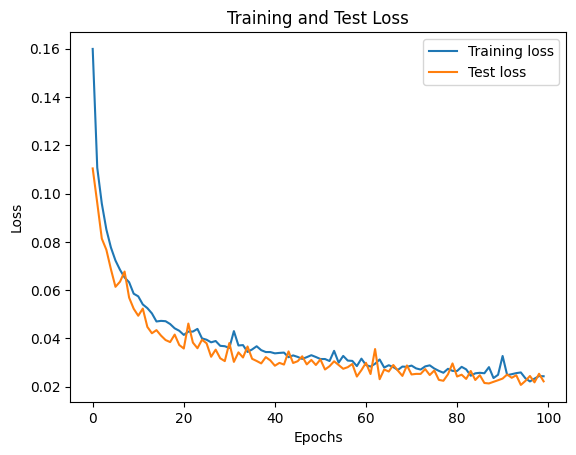

In [ ]:

train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Tracer les courbes de la perte d'entraînement et de la perte de test
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

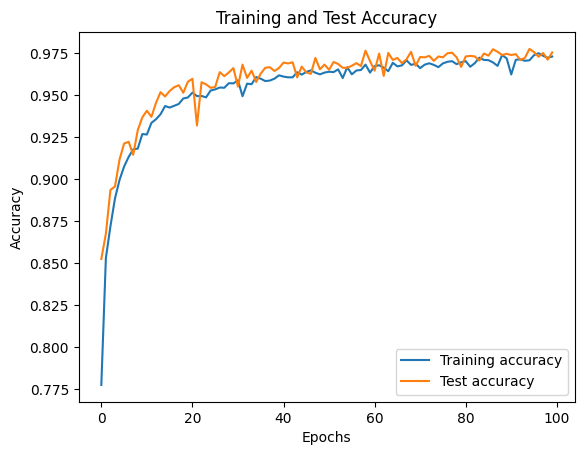

In [ ]:
# Obtention des valeurs du score d'entraînement et du score de test
train_score = history.history['accuracy']
test_score = history.history['val_accuracy']

# Tracer les courbes du score d'entraînement et du score de test
plt.plot(train_score, label='Training accuracy')
plt.plot(test_score, label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

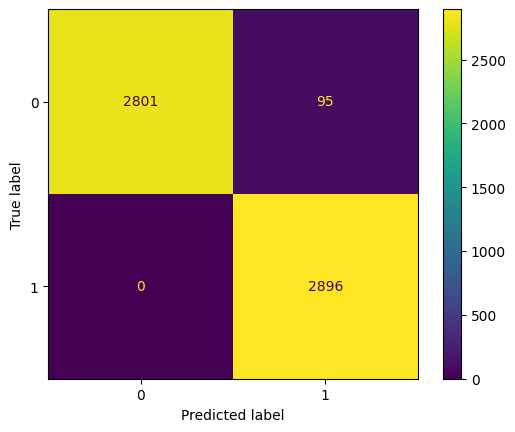

In [ ]:
#matrice de confusion
cm = confusion_matrix(y_test, y_pred_MLP)
disp = ConfusionMatrixDisplay(cm)
disp = disp.plot()
plt.show()